In [ ]:
# No wandb
import trainer as tb
import misc

log = []
modelname = "baseline"
data_path = "../data/dataset_mini/"
result_model_file = "results/dummy/dummy.pth"
result_model_file_final = "results/dummy/dummy_final.pth"
result_logs_file = "results/dummy/dummy_results.json"
res = tb.train_eval_model(model_name=modelname,
                          data_dir=data_path,
                          batch_size=2,
                          epochs=2,
                          momentum=0.9,
                          lr=0.01,
                          weight_decay=2e-05,
                          useCosineAnnealingLR=True,
                          warmup_epochs=0,
                          warmup_lr_decay=0.01,
                          label_smoothing=0.1,
                          class_weights=(0.5, 1),
                          n_data_workers=4,
                          pin_memory=True,
                          cuda_force=False,
                          log=log,
                          wandb_id=None,
                          wandb_project="",
                          safe_model=True,
                          safe_model_file=result_model_file,
                          safe_model_file_final=result_model_file_final)
misc.save_to_json_robust(res, result_logs_file)

In [ ]:
# No wandb
import trainer as tb
import misc

log = []
modelname = "resnet50_2fc"
data_path = "../data/dataset_mini/"
result_model_file = "results/dummy/dummy.pth"
result_logs_file = "results/dummy/dummy_results.json"
res = tb.train_eval_model(model_name=modelname,
                          data_dir=data_path,
                          batch_size=2,
                          epochs=4,
                          momentum=0.9,
                          lr=0.01,
                          weight_decay=2e-05,
                          useCosineAnnealingLR=True,
                          warmup_epochs=2,
                          warmup_lr_decay=0.01,
                          label_smoothing=0.1,
                          n_data_workers=4,
                          pin_memory=True,
                          cuda_force=False,
                          log=log,
                          wandb_id=None,
                          wandb_project="",
                          safe_model=True,
                          safe_model_file=result_model_file)
misc.save_to_json_robust(res, result_logs_file)

In [ ]:
# With wandb
import trainer as tb
import misc
import wandb
wandb.login()

# Start a new wandb run to track this script
run = wandb.init(
    # set the wandb project where this run will be logged
    project="my-awesome-project",
    name="test_on_mini_from_local",
)

log = []
modelname = "baseline"
data_path = "../data/dataset_mini/"
result_model_file = "results/dummy/dummy.pth"
result_logs_file = "results/dummy/dummy_results.json"
res = tb.train_eval_model(model_name=modelname,
                          data_dir=data_path,
                          batch_size=2,
                          epochs=4,
                          momentum=0.9,
                          lr=0.01,
                          weight_decay=2e-05,
                          useCosineAnnealingLR=True,
                          warmup_epochs=2,
                          warmup_lr_decay=0.01,
                          label_smoothing=0.1,
                          n_data_workers=4,
                          pin_memory=True,
                          cuda_force=False,
                          log=log,
                          wandb_id=run.id,
                          wandb_project="my-awesome-project",
                          safe_model=True,
                          safe_model_file=result_model_file)
misc.save_to_json_robust(res, result_logs_file)

In [1]:
# Testing the evaluate model function
import trainer

model_file_path = "results/colab/bl_enhanced_4_us_final.pth"
test_set_path = "../data/dataset_mini/test"

r = trainer.evaluate_model(model_file_path=model_file_path,
                           test_set_path=test_set_path,
                           batch_size=2,
                           num_workers=1,
                           make_detailed_predictions=True)
r


CUDA is not available.


Evaluation:   0%|          | 0/8 [00:00<?, ?it/s]

{'labels': [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
 'predictions': [0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0],
 'classes': ['non_smile', 'smile'],
 'detailed_predictions': [{'file': '00a454da495e11e28a7322000a1fa414_6.jpg',
   'true_label': 'non_smile',
   'predicted_label': 'non_smile',
   'probabilities': [0.6267724, 0.37322757]},
  {'file': '02ee8060b02f11e38fe012b1c8928cc9_6.jpg',
   'true_label': 'non_smile',
   'predicted_label': 'non_smile',
   'probabilities': [0.5560851, 0.44391486]},
  {'file': '044c14a2bff911e396ce0002c9de8044_6.jpg',
   'true_label': 'non_smile',
   'predicted_label': 'smile',
   'probabilities': [0.38814086, 0.6118591]},
  {'file': '0598ce50b1f711e3bd391271df4caaa4_6.jpg',
   'true_label': 'non_smile',
   'predicted_label': 'smile',
   'probabilities': [0.38239607, 0.61760396]},
  {'file': '061897ee69b811e2896422000a1fb003_6.jpg',
   'true_label': 'non_smile',
   'predicted_label': 'non_smile',
   'probabilities': [0.6611462, 0.33885378]},


Accuracy: 0.6250
Precision: 0.6250
Recall: 0.6250
F1 Score: 0.6250


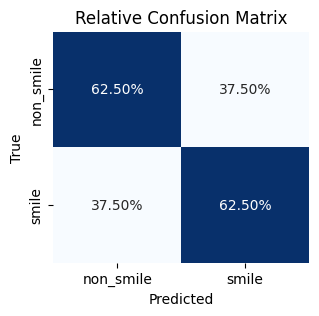

In [4]:
from sklearn.metrics import (accuracy_score, precision_recall_fscore_support,
                             confusion_matrix)
import matplotlib.pyplot as plt
import seaborn as sns

all_labels = r['labels']
all_preds = r['predictions']
classes = r['classes']

# Calculate overall metrics
accuracy = accuracy_score(all_labels, all_preds)
precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='binary')
conf_matrix = confusion_matrix(all_labels, all_preds)

# Print overall metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plot relative confusion matrix
plt.figure(figsize=(3.3, 3))
sns.heatmap(conf_matrix / conf_matrix.sum(axis=1)[:, None], annot=True, fmt=".2%",
            cmap="Blues", xticklabels=classes, yticklabels=classes, cbar=False)
plt.title("Relative Confusion Matrix")
plt.ylabel("True")
plt.xlabel("Predicted")
plt.show()